In [1]:
!pip install numpy mido pygame --quiet

In [2]:
import numpy
print("NumPy è stato importato correttamente!")

NumPy è stato importato correttamente!


In [3]:
# Installazione delle librerie necessarie
!pip install numpy
!pip install mido
!pip install pygame
!pip install matplotlib
!pip install pandas

In [4]:
import numpy as np
import random
from mido import Message, MidiFile, MidiTrack, tempo2bpm
from typing import List, Dict, Any, Tuple
import time
import mido
from mido import Message, MidiFile, MidiTrack

In [5]:
# MIDI Note numbers per la scala di Do maggiore (C4 a B4)
PITCH_RANGE = list(range(60, 72))  # Da C4 (60) a B4 (71)
MAX_VELOCITY = 100                 # Intensità del suono
NOTE_DURATION = 0.5                # Durata di base in secondi
DURATION_SET = [0.25, 0.5, 1.0]  # croma, semiminima, minima

In [6]:
# Progressione di accordi (I-IV-V-I in C maggiore)
CHORD_PROGRESSION = [60, 65, 67, 60] * 2  # C, F, G, C ripetuto

# Dizionario degli accordi validi
ACCORDI_VALIDI = {
    60: [60, 64, 67, 72],  # C Maj (C, E, G, C)
    65: [65, 69, 72, 77],  # F Maj (F, A, C, F)
    67: [67, 71, 74, 79],  # G Maj (G, B, D, G)
}


File MIDI salvato come: melodia_iniziale.mid
Target melodia: 32 note, 50 generazioni.
---------------------------------------------------------
Generazione  1/50 - Fitness Max: 13.51 (Pop. attuale: 13.51)
Generazione  5/50 - Fitness Max: 13.51 (Pop. attuale: 13.51)
Generazione 10/50 - Fitness Max: 13.51 (Pop. attuale: 13.51)
Generazione 15/50 - Fitness Max: 13.51 (Pop. attuale: 13.51)
Generazione 20/50 - Fitness Max: 13.51 (Pop. attuale: 13.51)
Generazione 25/50 - Fitness Max: 44.61 (Pop. attuale: 44.61)
Generazione 30/50 - Fitness Max: 44.61 (Pop. attuale: 44.61)
Generazione 35/50 - Fitness Max: 44.61 (Pop. attuale: 44.61)
Generazione 40/50 - Fitness Max: 44.61 (Pop. attuale: 44.61)
Generazione 45/50 - Fitness Max: 44.61 (Pop. attuale: 44.61)
Generazione 50/50 - Fitness Max: 44.61 (Pop. attuale: 44.61)
---------------------------------------------------------
Evoluzione completata. Fitness finale migliore: 44.61
File MIDI salvato come: melodia_evoluta.mid
File confronto MIDI salvato c

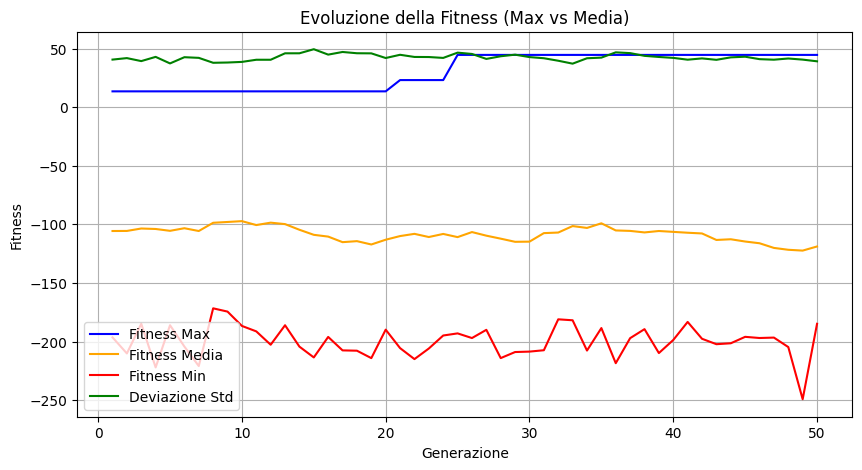

Genoma iniziale: [(68, 81, 0), (66, 93, 1), (64, 81, 0), (60, 79, 0), (63, 84, 1), (63, 60, 2), (69, 73, 0), (63, 96, 2), (60, 100, 1), (67, 99, 2), (61, 83, 1), (66, 58, 0), (61, 87, 0), (68, 89, 0), (60, 54, 1), (64, 70, 1), (63, 77, 1), (64, 76, 2), (69, 87, 0), (66, 86, 2), (61, 50, 1), (65, 62, 0), (63, 90, 1), (71, 75, 1), (67, 99, 2), (65, 87, 0), (65, 55, 1), (67, 55, 0), (67, 73, 1), (67, 78, 0), (71, 91, 2), (70, 56, 1)]
Genoma finale: [(61, 62, 1), (60, 50, 2), (60, 61, 1), (64, 71, 1), (65, 96, 1), (66, 51, 0), (68, 50, 1), (65, 75, 0), (68, 85, 1), (68, 50, 2), (62, 66, 2), (67, 93, 2), (62, 69, 2), (67, 50, 1), (65, 68, 2), (64, 78, 1), (68, 96, 0), (64, 68, 2), (68, 76, 2), (71, 95, 1), (69, 69, 1), (64, 61, 0), (60, 55, 1), (61, 55, 0), (67, 50, 2), (65, 58, 0), (69, 88, 0), (71, 50, 0), (67, 55, 1), (64, 57, 1), (63, 99, 2), (66, 56, 1)]
Note armoniche - Iniziale: 20.00, Finale: 50.00
Varianza pitch - Iniziale: 9.86, Finale: 9.33
Media salti - Iniziale: 3.55, Finale: 2

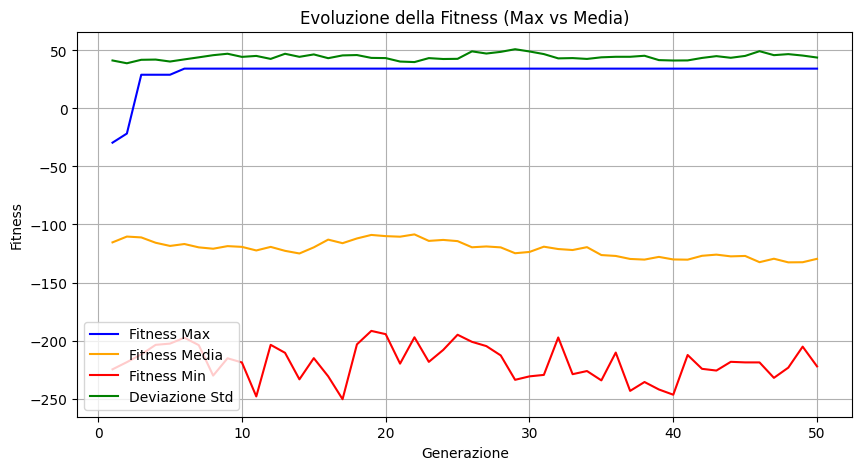

Genoma iniziale: [(71, 60, 2), (71, 93, 1), (69, 55, 0), (65, 85, 1), (71, 59, 0), (69, 51, 1), (63, 75, 1), (71, 86, 0), (68, 50, 2), (67, 75, 0), (64, 61, 0), (69, 97, 0), (65, 54, 1), (64, 75, 2), (68, 64, 2), (68, 78, 0), (64, 97, 0), (70, 86, 2), (67, 80, 2), (60, 87, 1), (68, 98, 1), (68, 97, 1), (66, 69, 1), (62, 99, 1), (64, 78, 2), (71, 55, 0), (71, 78, 2), (60, 86, 0), (60, 96, 1), (65, 75, 0), (60, 68, 2), (60, 55, 1)]
Genoma finale: [(66, 52, 2), (64, 76, 1), (65, 96, 1), (71, 55, 2), (63, 96, 1), (63, 97, 1), (65, 100, 1), (60, 92, 0), (65, 100, 0), (61, 75, 0), (67, 89, 0), (67, 63, 2), (64, 97, 0), (63, 100, 1), (67, 64, 1), (63, 60, 1), (70, 53, 1), (65, 59, 1), (60, 72, 2), (60, 60, 2), (61, 84, 2), (65, 67, 0), (66, 63, 1), (62, 92, 1), (71, 89, 0), (63, 98, 0), (67, 80, 2), (61, 62, 1), (67, 64, 0), (67, 69, 0), (67, 52, 1), (64, 65, 0)]
Note armoniche - Iniziale: 5.00, Finale: 65.00
Varianza pitch - Iniziale: 13.67, Finale: 8.71
Media salti - Iniziale: 3.65, Finale:

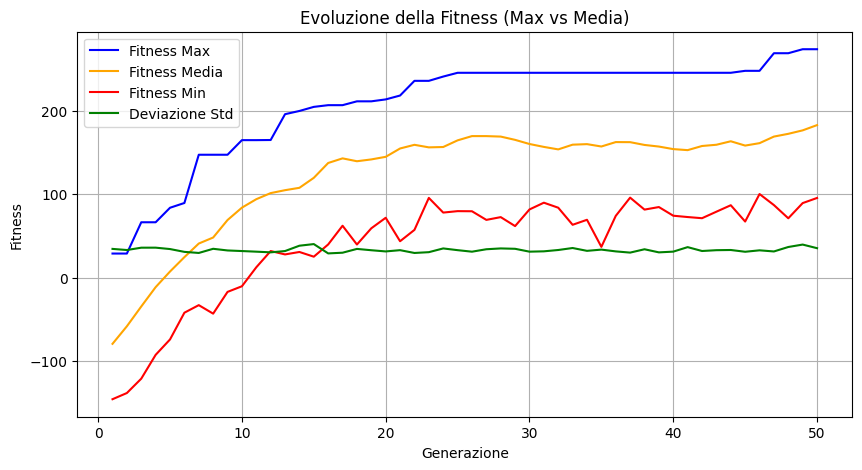

Genoma iniziale: [(69, 74, 2), (68, 76, 0), (61, 98, 1), (61, 97, 2), (65, 85, 0), (61, 90, 1), (66, 56, 2), (69, 86, 0), (66, 62, 1), (68, 99, 2), (61, 73, 1), (71, 83, 0), (67, 75, 2), (61, 100, 2), (60, 79, 1), (61, 58, 1), (65, 77, 2), (69, 51, 1), (71, 61, 1), (70, 94, 1), (65, 85, 2), (60, 88, 0), (65, 100, 0), (60, 82, 1), (64, 62, 2), (71, 88, 1), (70, 72, 0), (67, 100, 1), (67, 72, 0), (71, 77, 2), (69, 81, 1), (64, 74, 1)]
Genoma finale: [(60, 89, 0), (60, 64, 0), (64, 89, 0), (67, 58, 2), (65, 63, 0), (69, 61, 2), (69, 60, 1), (69, 71, 0), (67, 55, 0), (67, 50, 0), (67, 82, 1), (66, 86, 0), (60, 69, 0), (67, 90, 0), (60, 84, 1), (60, 69, 2), (64, 53, 1), (60, 60, 1), (67, 68, 2), (64, 55, 2), (69, 69, 0), (69, 55, 1), (65, 50, 1), (65, 70, 0), (71, 54, 0), (67, 82, 1), (67, 84, 1), (60, 64, 0), (64, 87, 2), (67, 80, 0), (67, 95, 0), (64, 74, 1)]
Note armoniche - Iniziale: 5.00, Finale: 290.00
Varianza pitch - Iniziale: 13.95, Finale: 10.48
Media salti - Iniziale: 3.71, Final

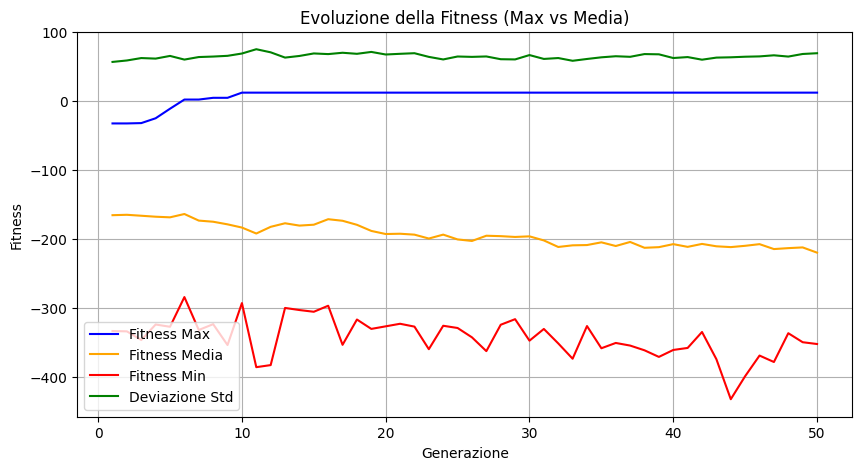

Genoma iniziale: [(67, 68, 0), (62, 99, 0), (61, 88, 1), (70, 61, 0), (67, 67, 1), (67, 79, 1), (69, 74, 1), (61, 98, 1), (67, 90, 0), (70, 90, 2), (65, 64, 1), (69, 56, 1), (64, 53, 1), (70, 87, 2), (64, 71, 2), (64, 82, 1), (67, 73, 0), (65, 63, 1), (64, 65, 2), (68, 100, 2), (63, 81, 1), (62, 80, 0), (64, 92, 0), (67, 57, 2), (70, 79, 0), (67, 96, 0), (67, 52, 0), (61, 66, 1), (63, 59, 0), (65, 70, 0), (60, 93, 1), (67, 78, 1)]
Genoma finale: [(65, 76, 0), (64, 91, 2), (67, 58, 2), (61, 65, 2), (62, 71, 0), (65, 64, 1), (63, 90, 1), (66, 51, 1), (61, 74, 1), (66, 83, 2), (61, 60, 2), (64, 51, 1), (67, 92, 1), (67, 80, 1), (60, 100, 0), (64, 56, 0), (65, 89, 1), (70, 93, 1), (71, 72, 2), (70, 77, 1), (65, 54, 2), (65, 74, 0), (65, 58, 2), (61, 92, 1), (67, 83, 2), (67, 95, 2), (68, 50, 2), (68, 78, 2), (63, 68, 0), (64, 97, 2), (66, 75, 0), (63, 63, 1)]
Note armoniche - Iniziale: 20.00, Finale: 35.00
Varianza pitch - Iniziale: 8.50, Finale: 7.53
Media salti - Iniziale: 3.61, Finale: 

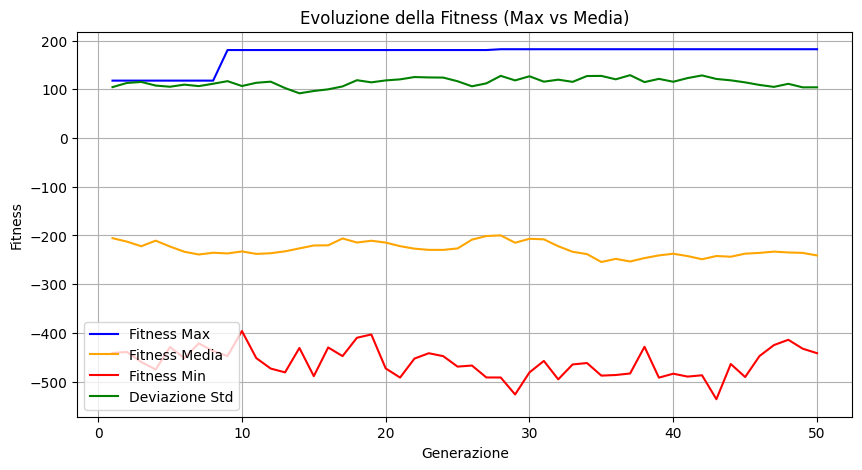

Genoma iniziale: [(67, 83, 1), (66, 67, 2), (60, 73, 1), (66, 79, 2), (65, 96, 2), (70, 79, 0), (62, 67, 2), (60, 99, 1), (60, 97, 1), (71, 52, 1), (71, 97, 2), (66, 93, 2), (60, 51, 1), (60, 90, 2), (60, 62, 1), (64, 82, 2), (62, 79, 2), (61, 61, 0), (66, 68, 2), (64, 61, 2), (67, 92, 0), (70, 82, 0), (65, 53, 2), (65, 99, 1), (65, 75, 0), (71, 64, 2), (61, 57, 2), (65, 89, 0), (61, 81, 2), (71, 84, 0), (71, 55, 2), (62, 71, 1)]
Genoma finale: [(62, 83, 0), (60, 63, 1), (60, 70, 0), (68, 80, 0), (63, 74, 1), (71, 50, 2), (62, 63, 2), (65, 84, 1), (67, 57, 1), (62, 73, 0), (68, 100, 1), (69, 57, 0), (64, 80, 1), (60, 50, 1), (70, 56, 0), (66, 53, 2), (60, 90, 2), (64, 71, 2), (60, 81, 0), (67, 75, 0), (69, 70, 0), (60, 51, 2), (70, 100, 1), (69, 57, 0), (64, 72, 1), (71, 81, 2), (61, 59, 0), (69, 56, 1), (63, 50, 2), (67, 65, 2), (60, 74, 2), (60, 86, 0)]
Note armoniche - Iniziale: 35.00, Finale: 80.00
Varianza pitch - Iniziale: 14.63, Finale: 14.64
Media salti - Iniziale: 3.84, Finale

In [7]:
class GeneticComposer:
    def __init__(self, population_size=100, generations=50, mutation_rate=0.10):
        self.POPULATION_SIZE = population_size
        self.GENERATIONS = generations
        self.MUTATION_RATE = mutation_rate
        self.CROSSOVER_RATE = 0.7

        # Costanti musicali
        self.PITCH_RANGE = list(range(60, 72))
        self.MIN_PITCH = min(self.PITCH_RANGE)
        self.MAX_PITCH = max(self.PITCH_RANGE)
        self.MIN_VELOCITY = 50
        self.MAX_VELOCITY = 100
        self.DURATION_SET = [0.25, 0.5, 1.0]
        self.CHORD_PROGRESSION = [60, 65, 67, 60] * 2
        self.ACCORDI_VALIDI = {
            60: [60, 64, 67, 72],
            65: [65, 69, 72, 77],
            67: [67, 71, 74, 79],
        }

        # Lunghezza melodia
        self.MELODY_LENGTH = len(self.CHORD_PROGRESSION) * 4

        # Pesi della fitness
        self.W_HARMONY = 1.0
        self.W_FLUIDITY = 1.5
        self.W_VARIANCE = 0.5
        self.W_REPETITION = 0.3
        self.W_VELOCITY_PENALTY = 0.2

        # Debug
        self.DEBUG = False
        self.DEBUG_MUTATION = False
    # Genoma: un array di tuple, dove ogni tupla è (pitch, velocity) per una nota.
    # Non ottimizziamo la durata (duration) per mantenere la semplicità.
    # L'individuo sarà un dizionario simile a quelli usati nei tuoi notebook.
    # Esempio di genoma: [(60, 90), (62, 85), (64, 90), ...]
    
    def _create_random_genoma(self):
        genoma = []
        for _ in range(self.MELODY_LENGTH):
            pitch = random.randint(self.MIN_PITCH, self.MAX_PITCH)
            velocity = random.randint(self.MIN_VELOCITY, self.MAX_VELOCITY)
            duration_index = random.randint(0, len(self.DURATION_SET) - 1)
            genoma.append((pitch, velocity, duration_index))
        return genoma
    
    def _initialize_population(self) -> List[Dict[str, Any]]:
        """Inizializza la popolazione iniziale di genomi."""
        population = []
        for _ in range(self.POPULATION_SIZE):
            population.append({
                'genoma': self._create_random_genoma(),
                'fitness': 0.0  # Verrà calcolata
            })
        return population

    def _calculate_fitness(self, genoma: List[Tuple[int, int, int]]) -> Tuple[float, float, float]:
        """
        Calcola il punteggio di fitness di un individuo (melodia).
        Restituisce: (score armonico, score fluidità, score totale)
        """
        fitness_score = 0.0
        harmony_score = 0.0
        fluidity_score = 0.0
    
        # 1. Armonia (Coerenza con gli Accordi Target)
        for i, (pitch, velocity, duration_index) in enumerate(genoma):
            chord_index = i // 4
            target_chord_root = self.CHORD_PROGRESSION[chord_index]
            valid_notes = self.ACCORDI_VALIDI.get(target_chord_root, [])
    
            if pitch in valid_notes:
                harmony_score += 10.0
            else:
                harmony_score -= 5.0
    
        fitness_score += harmony_score * self.W_HARMONY
    
        # 2. Fluidità (salti melodici)
        for i in range(1, self.MELODY_LENGTH):
            pitch_prev = genoma[i-1][0]
            pitch_curr = genoma[i][0]
            pitch_difference = abs(pitch_curr - pitch_prev)
    
            if pitch_difference > 5:
                fluidity_score -= (pitch_difference - 5) * 1.5
    
        fitness_score += fluidity_score * self.W_FLUIDITY
    
        # 3. Varianza dei pitch
        pitches = [p for p, v, d in genoma]
        pitch_variance = np.var(pitches)
        fitness_score += pitch_variance * self.W_VARIANCE
    
        # 4. Ritmo
        durations = [self.DURATION_SET[d] for _, _, d in genoma]
        total_duration = sum(durations)
    
        duration_variance = np.var(durations)
        fitness_score += duration_variance * 0.5  # peso arbitrario
    
        if total_duration > self.MELODY_LENGTH * 0.5:
            fitness_score -= (total_duration - self.MELODY_LENGTH * 0.5) * 2.0
    
        # 5. Ripetizione tematica
        pitch_counts = {p: pitches.count(p) for p in set(pitches)}
        repeated_notes = sum(1 for count in pitch_counts.values() if count > 1)
        fitness_score += repeated_notes * self.W_REPETITION
    
        # 6. Penalità per velocity troppo bassa
        velocities = [v for p, v, d in genoma]
        low_velocity_penalty = sum(1 for v in velocities if v < 60)
        fitness_score -= low_velocity_penalty * self.W_VELOCITY_PENALTY
    
        # 7. Bonus per motivi ripetuti (sequenze di 3 note)
        motivi = [tuple(pitches[i:i+3]) for i in range(len(pitches)-2)]
        motivo_counts = {m: motivi.count(m) for m in set(motivi)}
        ripetizioni_motivi = sum(1 for count in motivo_counts.values() if count > 1)
        fitness_score += ripetizioni_motivi * 0.5
    
        return harmony_score, fluidity_score, fitness_score
    
    
    
    def _fitness(self, population: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
        """Calcola la fitness per l'intera popolazione e ordina."""
        for individual in population:
            _, _, total_score = self._calculate_fitness(individual['genoma'])
            individual['fitness'] = total_score
            if self.DEBUG:
                print(f"Fitness calcolata: {total_score}")
    
        population.sort(key=lambda x: x['fitness'], reverse=True)
        return population




    def _selection(self, population: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
        """
        Selezione basata su un approccio ibrido: elitismo e selezione casuale pesata.
        Mantiene il 20% dei migliori e seleziona il resto da un pool pesato.
        """
        num_elite = int(self.POPULATION_SIZE * 0.2)
        elite = population[:num_elite]
    
        candidates = population[num_elite:]
        total_fitness = sum(i['fitness'] for i in candidates)
    
        if total_fitness <= 0:
            weights = [1] * len(candidates)
        else:
            weights = [i['fitness'] / total_fitness for i in candidates]
    
        parents = random.choices(candidates, weights=weights, k=self.POPULATION_SIZE - num_elite)
        return elite + parents

    def _selection_tournament(self, population, k=3):
        """
        Selezione a torneo: mantiene l'élite e seleziona il resto scegliendo il migliore tra k candidati casuali.
        """
        selected = []
        num_elite = int(self.POPULATION_SIZE * 0.2)
        selected.extend(population[:num_elite])  # elitismo

        while len(selected) < self.POPULATION_SIZE:
            contenders = random.sample(population, k)
            winner = max(contenders, key=lambda x: x['fitness'])
            selected.append({'genoma': winner['genoma'].copy(), 'fitness': 0.0})
    
        return selected

    
    def _crossover(self, population: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
        """
        Applica il Single Point Crossover.
        """
        new_population = []
    
        # Manteniamo l'individuo migliore non modificato (Elitismo)
        new_population.append(population[0])
    
        for i in range(1, self.POPULATION_SIZE // 2):
            parent1 = population[i * 2]
            parent2 = population[i * 2 + 1]
    
            if random.random() < self.CROSSOVER_RATE:
                point = random.randint(1, self.MELODY_LENGTH - 1)
    
                child1_genoma = parent1['genoma'][:point] + parent2['genoma'][point:]
                child2_genoma = parent2['genoma'][:point] + parent1['genoma'][point:]
    
                new_population.append({'genoma': child1_genoma, 'fitness': 0.0})
                new_population.append({'genoma': child2_genoma, 'fitness': 0.0})
            else:
                new_population.append(parent1)
                new_population.append(parent2)
    
        return new_population[:self.POPULATION_SIZE]
    
    def _mutation(self, population: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
        """
        Applica la mutazione ai genomi: pitch/velocity prioritaria, durata ritmica separata.
        """
        for individual in population[1:]:  # Evita il migliore
            genoma = individual['genoma']
            for i in range(len(genoma)):
                pitch, velocity, duration_index = genoma[i]
    
                if random.random() < self.MUTATION_RATE:
                    pitch_delta = random.choice([-2, -1, 1, 2])
                    new_pitch = pitch + pitch_delta
                    new_pitch = max(self.MIN_PITCH, min(self.MAX_PITCH, new_pitch))
    
                    velocity_delta = random.randint(-10, 10)
                    new_velocity = velocity + velocity_delta
                    new_velocity = max(self.MIN_VELOCITY, min(self.MAX_VELOCITY, new_velocity))
    
                    genoma[i] = (new_pitch, new_velocity, duration_index)
    
                elif random.random() < 0.15:
                    new_duration_index = random.randint(0, len(self.DURATION_SET) - 1)
                    genoma[i] = (pitch, velocity, new_duration_index)
    
        return population


    def create_midi_file(self, genoma: List[Tuple[int, int, int]], filename: str = "melodia_evoluta.mid"):
        """Converte il genoma (melodia) nel file MIDI riproducibile."""
        mid = MidiFile()
        track = MidiTrack()
        mid.tracks.append(track)
    
        tempo = mido.bpm2tempo(120)
        track.append(mido.MetaMessage('set_tempo', tempo=tempo))
        track.append(mido.Message('program_change', program=1, time=0))
    
        ticks_per_beat = mid.ticks_per_beat
    
        for pitch, velocity, duration_index in genoma:
            duration = int(self.DURATION_SET[duration_index] * ticks_per_beat)
            track.append(Message('note_on', note=pitch, velocity=velocity, time=0))
            track.append(Message('note_off', note=pitch, velocity=velocity, time=duration))
    
        mid.save(filename)
        print(f"File MIDI salvato come: {filename}")
    
    
    def create_comparison_midi(self, initial: List[Tuple[int, int, int]], final: List[Tuple[int, int, int]], filename="confronto.mid"):
        mid = MidiFile()
        track = MidiTrack()
        mid.tracks.append(track)
    
        tempo = mido.bpm2tempo(120)
        track.append(mido.MetaMessage('set_tempo', tempo=tempo))
        track.append(mido.Message('program_change', program=1, time=0))
    
        ticks_per_beat = mid.ticks_per_beat
    
        for pitch, velocity, duration_index in initial:
            duration = int(self.DURATION_SET[duration_index] * ticks_per_beat)
            track.append(Message('note_on', note=pitch, velocity=velocity, time=0))
            track.append(Message('note_off', note=pitch, velocity=velocity, time=duration))
    
        track.append(Message('note_off', note=0, velocity=0, time=ticks_per_beat * 2))
    
        for pitch, velocity, duration_index in final:
            duration = int(self.DURATION_SET[duration_index] * ticks_per_beat)
            track.append(Message('note_on', note=pitch, velocity=velocity, time=0))
            track.append(Message('note_off', note=pitch, velocity=velocity, time=duration))
    
        mid.save(filename)
        print(f"File confronto MIDI salvato come: {filename}")
    
    def evolve(self, use_tournament=False):
        import csv
        import pandas as pd
        import matplotlib.pyplot as plt
    
        population = self._initialize_population()
        population = self._fitness(population)
    
        initial_genome = population[0]['genoma']
        self.create_midi_file(initial_genome, filename="melodia_iniziale.mid")
    
        best_individual = population[0]
    
        print(f"Target melodia: {self.MELODY_LENGTH} note, {self.GENERATIONS} generazioni.")
        print("---------------------------------------------------------")
    
        with open("fitness_evoluzione.csv", "w", newline="") as f:
            writer = csv.writer(f, delimiter=';')
            writer.writerow(["Generazione", "Fitness Massima", "Fitness Media", "Fitness Minima", "Deviazione Std"])
    
        for generation in range(self.GENERATIONS):
            if use_tournament:
                population = self._selection_tournament(population, k=3)
            else:
                population = self._selection(population)
            population = self._crossover(population)
            population = self._mutation(population)
            population = self._fitness(population)
    
            fitness_values = [ind['fitness'] for ind in population]
            fitness_media = sum(fitness_values) / len(fitness_values)
            fitness_minima = min(fitness_values)
            fitness_std = np.std(fitness_values)
    
            with open("fitness_evoluzione.csv", "a", newline="") as f:
                writer = csv.writer(f, delimiter=';')
                writer.writerow([generation + 1, population[0]['fitness'], fitness_media, fitness_minima, fitness_std])
    
            if population[0]['fitness'] > best_individual['fitness']:
                best_individual = population[0]
    
            if (generation + 1) % 5 == 0 or generation == 0:
                print(f"Generazione {generation+1:2d}/{self.GENERATIONS} - Fitness Max: {best_individual['fitness']:.2f} (Pop. attuale: {population[0]['fitness']:.2f})")
    
        print("---------------------------------------------------------")
        print(f"Evoluzione completata. Fitness finale migliore: {best_individual['fitness']:.2f}")
    
        self.create_midi_file(best_individual['genoma'])
        self.create_comparison_midi(initial_genome, best_individual['genoma'])
    
        df = pd.read_csv("fitness_evoluzione.csv", sep=';')
        plt.figure(figsize=(10, 5))
        plt.plot(df["Generazione"], df["Fitness Massima"], label="Fitness Max", color='blue')
        plt.plot(df["Generazione"], df["Fitness Media"], label="Fitness Media", color='orange')
        plt.plot(df["Generazione"], df["Fitness Minima"], label="Fitness Min", color='red')
        plt.plot(df["Generazione"], df["Deviazione Std"], label="Deviazione Std", color='green')
        plt.xlabel("Generazione")
        plt.ylabel("Fitness")
        plt.title("Evoluzione della Fitness (Max vs Media)")
        plt.legend()
        plt.grid(True)
        plt.savefig("grafico_fitness.png")
        plt.show()
    
        print("Genoma iniziale:", initial_genome)
        print("Genoma finale:", best_individual['genoma'])
    
        initial_harmony_score = self._calculate_fitness(initial_genome)[0]
        final_harmony_score = self._calculate_fitness(best_individual['genoma'])[0]
        print(f"Note armoniche - Iniziale: {initial_harmony_score:.2f}, Finale: {final_harmony_score:.2f}")
    
        initial_pitches = [p for p, v, d in initial_genome]
        final_pitches = [p for p, v, d in best_individual['genoma']]
        print(f"Varianza pitch - Iniziale: {np.var(initial_pitches):.2f}, Finale: {np.var(final_pitches):.2f}")
    
        initial_jumps = [abs(initial_pitches[i+1] - initial_pitches[i]) for i in range(len(initial_pitches)-1)]
        final_jumps = [abs(final_pitches[i+1] - final_pitches[i]) for i in range(len(final_pitches)-1)]
        print(f"Media salti - Iniziale: {np.mean(initial_jumps):.2f}, Finale: {np.mean(final_jumps):.2f}")
    
        return best_individual


# Esecuzione del progetto!
composer = GeneticComposer()
melodia_ottimale = composer.evolve()
# Selezione pesata vs torneo
composer_pesata = GeneticComposer()
best_individual_pesata = composer_pesata.evolve(use_tournament=False)

composer_torneo = GeneticComposer()
best_individual_torneo = composer_torneo.evolve(use_tournament=True)

print("Fitness finale (pesata):", best_individual_pesata['fitness'])
print("Fitness finale (torneo):", best_individual_torneo['fitness'])

# Analisi parametrica: melodico vs armonico
composer_melodico = GeneticComposer(mutation_rate=0.10)
composer_melodico.W_HARMONY = 1.0
composer_melodico.W_FLUIDITY = 3.0
melodia_melodica = composer_melodico.evolve()

composer_armonico = GeneticComposer(mutation_rate=0.10)
composer_armonico.W_HARMONY = 3.0
composer_armonico.W_FLUIDITY = 1.0
melodia_armonica = composer_armonico.evolve()

print("Melodica - Fitness finale:", melodia_melodica['fitness'])
print("Armonica - Fitness finale:", melodia_armonica['fitness'])
